In [12]:
import librosa
import librosa.display
import IPython
import numpy as np
import pandas as pd
import scipy
import sklearn
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# load audio file for each participant in conversation
audio_p1 = './data/audio/clean/conv_01_pid1_clean.wav'
audio_p2 = './data/audio/clean/conv_01_pid2_clean.wav'
audio_p3 = './data/audio/clean/conv_01_pid3_clean.wav'

# y = audio time series
# Each value in y represents the amplitude of the audio signal at a specific point in time, 
# and the sequence of samples (y) provides a representation of the waveform of the audio signal.
# sr = sampling rate of y
# The # of samples of the audio signal that are taken per second, usually measured in hertz (Hz).
y_p1, sr_p1 = librosa.core.load(audio_p1, offset=30.0, duration=120.0)
y_p2, sr_p2 = librosa.core.load(audio_p2, offset=30.0, duration=120.0)
y_p3, sr_p3 = librosa.core.load(audio_p3, offset=30.0, duration=120.0)

In [14]:
print('---Audio_P1---')
print('Sampling Rate: ' + str(sr_p1) + ' samples per sec')
print('Total Samples: '+ str(np.size(y_p1)))
print('Length: '+ str(np.size(y_p1)/sr_p1) + 's')

print('\n---Audio_P2---')
print('Sampling Rate: ' + str(sr_p2) + ' samples per sec')
print('Total Samples: '+ str(np.size(y_p2)))
print('Length: '+ str(np.size(y_p2)/sr_p2) + 's')

print('\n---Audio_P3---')
print('Sampling Rate: ' + str(sr_p3) + ' samples per sec')
print('Total Samples: '+ str(np.size(y_p3)))
print('Length: '+ str(np.size(y_p3)/sr_p3) + 's')

---Audio_P1---
Sampling Rate: 22050 samples per sec
Total Samples: 2646000
Length: 120.0s

---Audio_P2---
Sampling Rate: 22050 samples per sec
Total Samples: 2646000
Length: 120.0s

---Audio_P3---
Sampling Rate: 22050 samples per sec
Total Samples: 2646000
Length: 120.0s


In [15]:
# Hop length refers to the number of audio samples that are skipped between successive analysis 
# frames in a digital audio signal processing operation. It determines the overlap between adjacent 
# frames and affects the temporal resolution of the analysis.
hop_length = 256
# Frame length refers to the number of audio samples that are included in each analysis frame in a 
# digital audio signal processing operation. It determines the frequency resolution of the analysis 
# and affects the level of detail that can be captured in the audio signal.
frame_length = 512

# Energy calculations
energy_p1 = np.array([
    sum(abs(y_p1[i:i+frame_length]**2))
    for i in range(0, len(y_p1), hop_length)
])
energy_p2 = np.array([
    sum(abs(y_p2[i:i+frame_length]**2))
    for i in range(0, len(y_p2), hop_length)
])
energy_p3 = np.array([
    sum(abs(y_p3[i:i+frame_length]**2))
    for i in range(0, len(y_p3), hop_length)
])

# Root Mean Square Energy (RMSE) calculations
rmse_p1 = librosa.feature.rms(y=y_p1, frame_length=frame_length, hop_length=hop_length, center=True)[0]
rmse_p2 = librosa.feature.rms(y=y_p2, frame_length=frame_length, hop_length=hop_length, center=True)[0]
rmse_p3 = librosa.feature.rms(y=y_p3, frame_length=frame_length, hop_length=hop_length, center=True)[0]

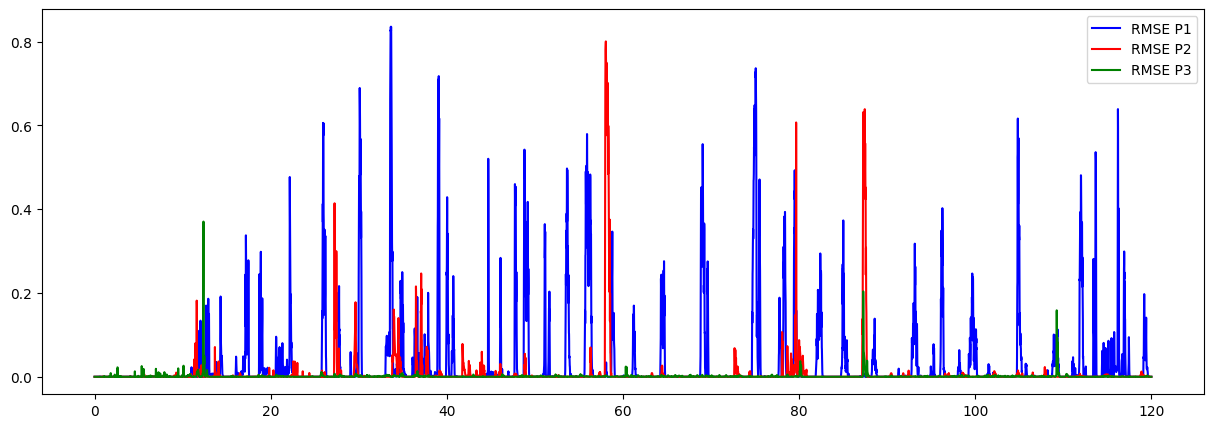

In [16]:
# Plot the three RMSEs along a waveform

frames_p1 = range(len(energy_p1))
frames_p2 = range(len(energy_p2))
frames_p3 = range(len(energy_p3))

t_p1 = librosa.frames_to_time(frames_p1, sr=sr_p1, hop_length=hop_length)
t_p2 = librosa.frames_to_time(frames_p2, sr=sr_p2, hop_length=hop_length)
t_p3 = librosa.frames_to_time(frames_p3, sr=sr_p3, hop_length=hop_length)

# Normalized for visualization

plt.figure(figsize=(15, 5))
plt.plot(t_p1[:len(rmse_p1)], rmse_p1, color='blue') 
plt.plot(t_p2[:len(rmse_p2)], rmse_p2, color='red')
plt.plot(t_p3[:len(rmse_p3)], rmse_p3, color='green')

plt.legend(('RMSE P1', 'RMSE P2', 'RMSE P3'))

In [17]:
# Need to calculate a value that represents volume 'mirroring'
# For each reply, calculate volume absolute difference between speech and response

# Each time someone speaks:
    # Calculate average volume of utterance 'r'
    # Calculate absolute difference between reply 'r' and prompt 'p'



# For meeting with Rebecca:
# Data seems to be a complete mess... only able to gather 6 transcripted conversations?

In [ ]:
# How to detect 'each time someone speaks'?
# Transcribe using Google Speech
